In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Imported library successfully')

Imported library successfully


In [2]:
import warnings
warnings.filterwarnings('ignore')
print('Removed warnings error succesfully')

Removed warnings error succesfully


In [3]:
p = sns.load_dataset('penguins')
print('Data imported successfully')

Data imported successfully


In [4]:
# First five datas
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
# Last five datas
p.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [6]:
# Checking shape
p.shape

(344, 7)

In [7]:
# Getting null values
p.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In the above table 11 sex entries are missing in above data and bill_length_mm, bill_depth_mm,flipper_length_mm,body_mass_g are 2 values are missing. So sex cannot determined so drop the rows where there is a missing entry.

In [8]:
# Deleting all NaN rows
p = p.dropna()

In [9]:
p.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Now we donr with the Data Cleaning process. Move to Data Vosulization process.

In [10]:
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<AxesSubplot:xlabel='species', ylabel='count'>

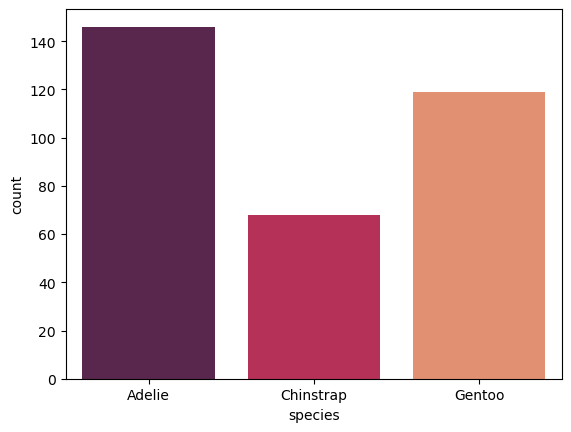

In [11]:
# Now get the count plot of some column
sns.countplot(data=p,x='species',palette='rocket')

Adelie spices maximum count among the three.Then next Gento and Chinstrap has least count.

<AxesSubplot:xlabel='species', ylabel='count'>

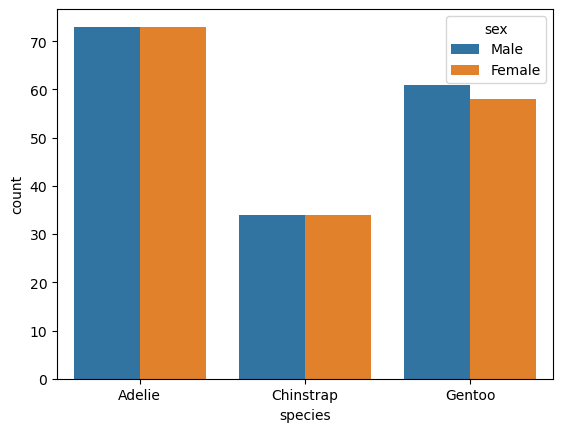

In [12]:
sns.countplot(data=p,x='species',hue='sex')

Generally all 3 categary have equal male and female count.

<AxesSubplot:xlabel='sex', ylabel='count'>

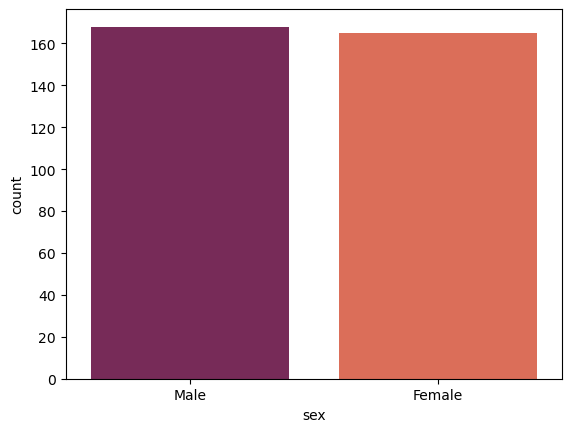

In [13]:
sns.countplot(data=p,x='sex',palette='rocket')

 The count of male and female approximately equal.

<AxesSubplot:xlabel='island', ylabel='count'>

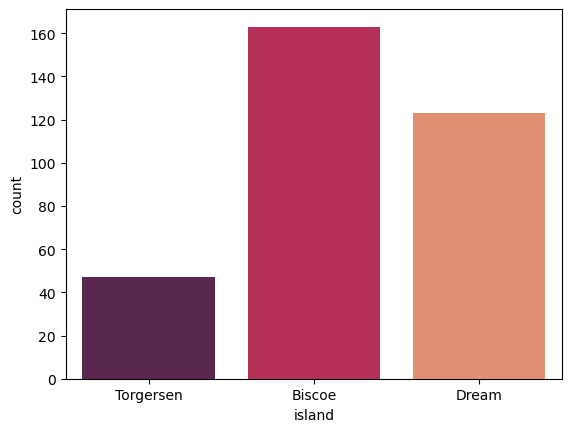

In [14]:
sns.countplot(data=p,x='island',palette='rocket')

In Biscoe island has highest countand Dream island second hishest countand Torgersen has least count.

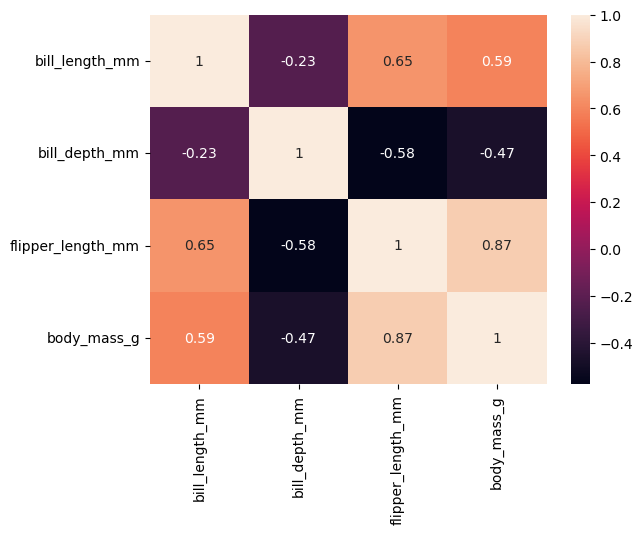

<Figure size 100x800 with 0 Axes>

In [15]:
# Get corelations of data using heatmap
p_corr = p.corr()
sns.heatmap(data=p_corr,annot=True)
plt.figure(figsize=(1,8),dpi=100)
plt.show()

In above bill_depth_mm has negative corelation.
Bill_length_mm,flipper_length_mm and body_mass_g has positive relation.

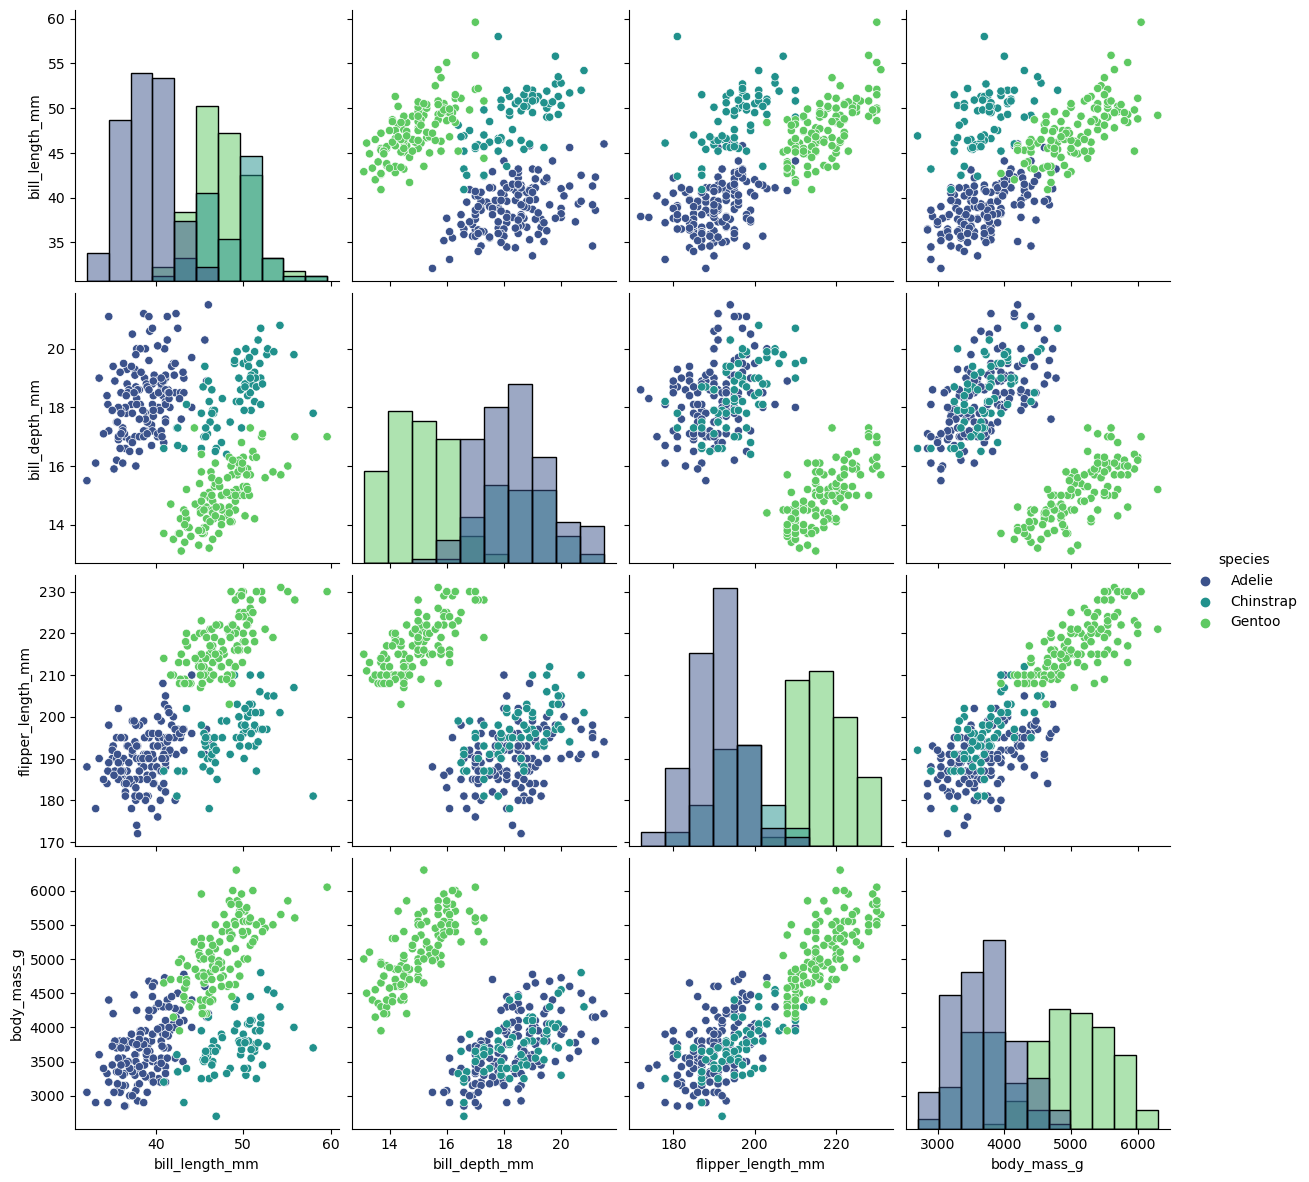

In [16]:
# Get some intutions on species
sns.pairplot(data=p,hue='species',palette='viridis',diag_kind='hist',height=3)

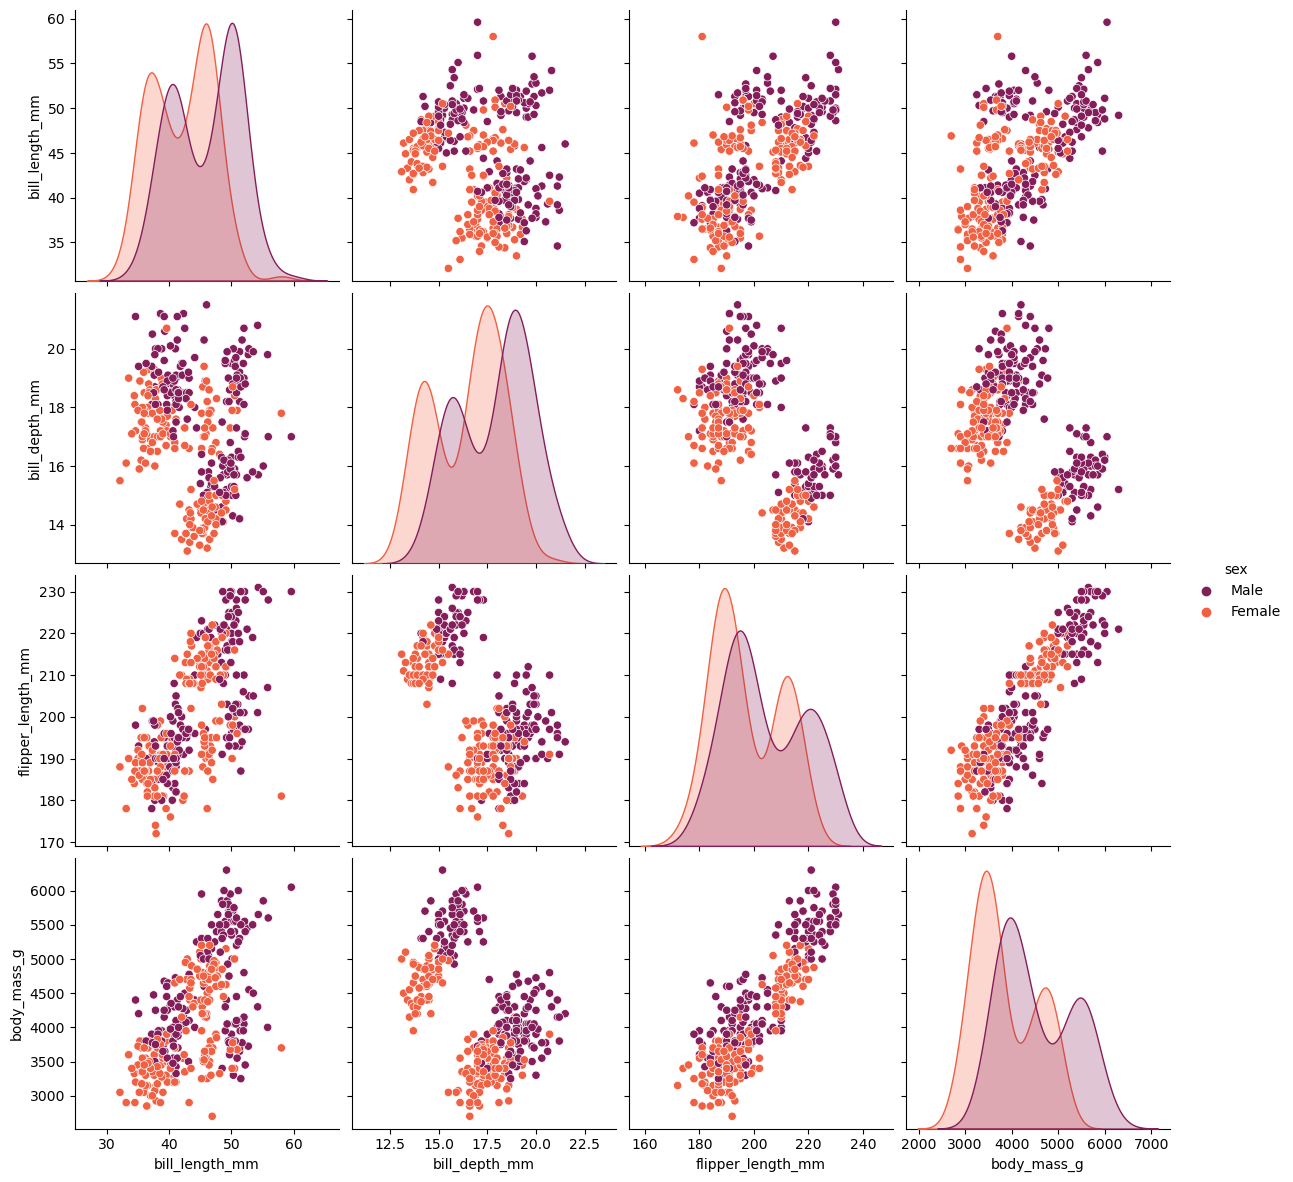

In [17]:
# Get some intution on SEX
sns.pairplot(data=p,hue='sex',palette='rocket',height=3)
plt.show()

<AxesSubplot:xlabel='island', ylabel='bill_length_mm'>

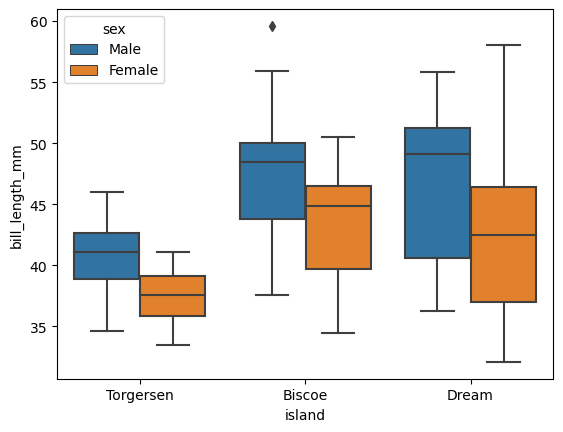

In [18]:
# Now checking the outlier in dataset
sns.boxplot(data=p,x='island',y='bill_length_mm',hue='sex')

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

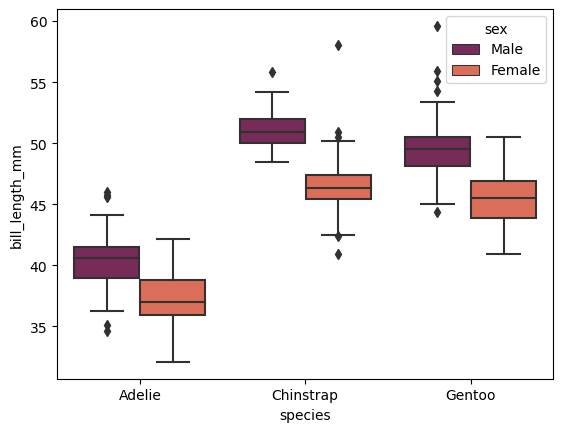

In [19]:
sns.boxplot(data=p,x='species',y='bill_length_mm',hue='sex',palette='rocket')

<AxesSubplot:xlabel='island', ylabel='bill_depth_mm'>

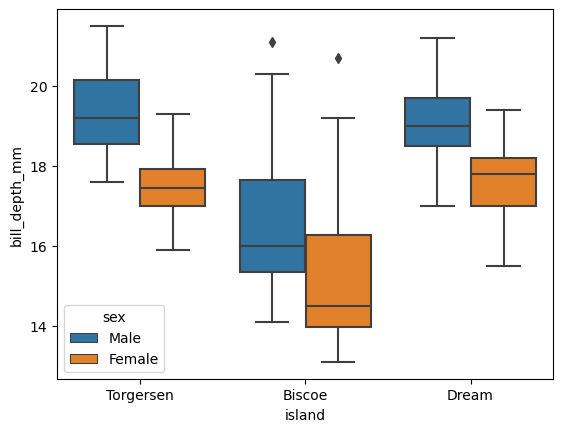

In [20]:
sns.boxplot(data=p,x='island',y='bill_depth_mm',hue='sex')

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

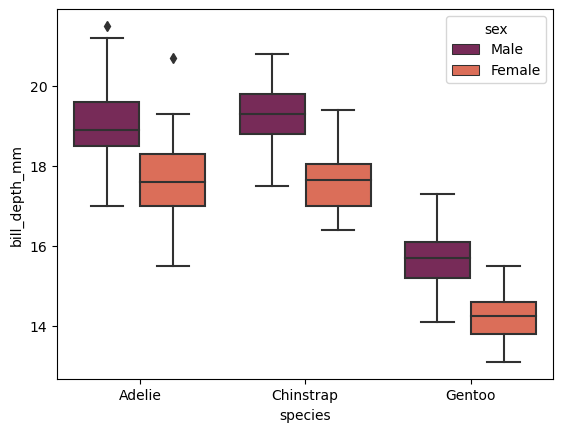

In [21]:
sns.boxplot(data=p,x='species',y='bill_depth_mm',hue='sex',palette='rocket')

<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

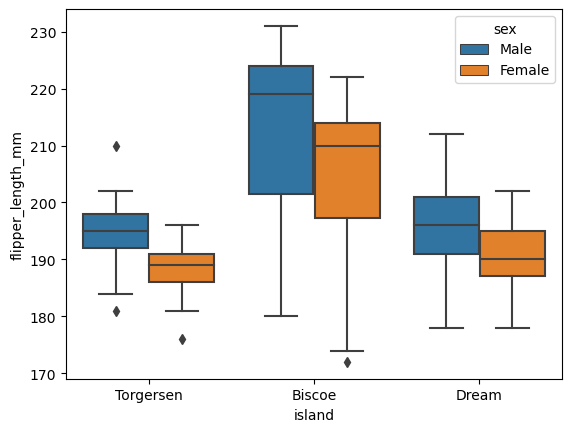

In [22]:
sns.boxplot(data=p,x='island',y='flipper_length_mm',hue='sex')

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

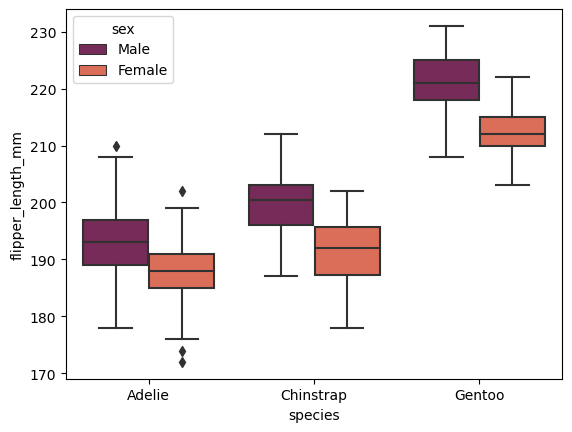

In [23]:
sns.boxplot(data=p,x='species',y='flipper_length_mm',hue='sex',palette='rocket')

In [24]:
# Get the relationship between sex and Features of Penguins
def scatterplot(data,x,y,hue,title):
    # Set plot setting
    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(2,2,figsize=(15,15))
    fig.suptitle(title,fontsize=16)
    
    # Now plot 3-4 graphs
    sns.scatterplot(data=data,x=x,y=y,hue=hue,palette='rocket',ax=axes[0,0])
    sns.kdeplot(data=data,x=x,y=y,hue=hue,palette='rocket',ax=axes[0,1],fill=True)
    sns.histplot(data=data,x=x,y=y,hue=hue,palette='rocket',ax=axes[1,0])
    sns.lineplot(data=data,x=x,y=y,hue=hue,palette='rocket',ax=axes[1,1])
    
    plt.show()

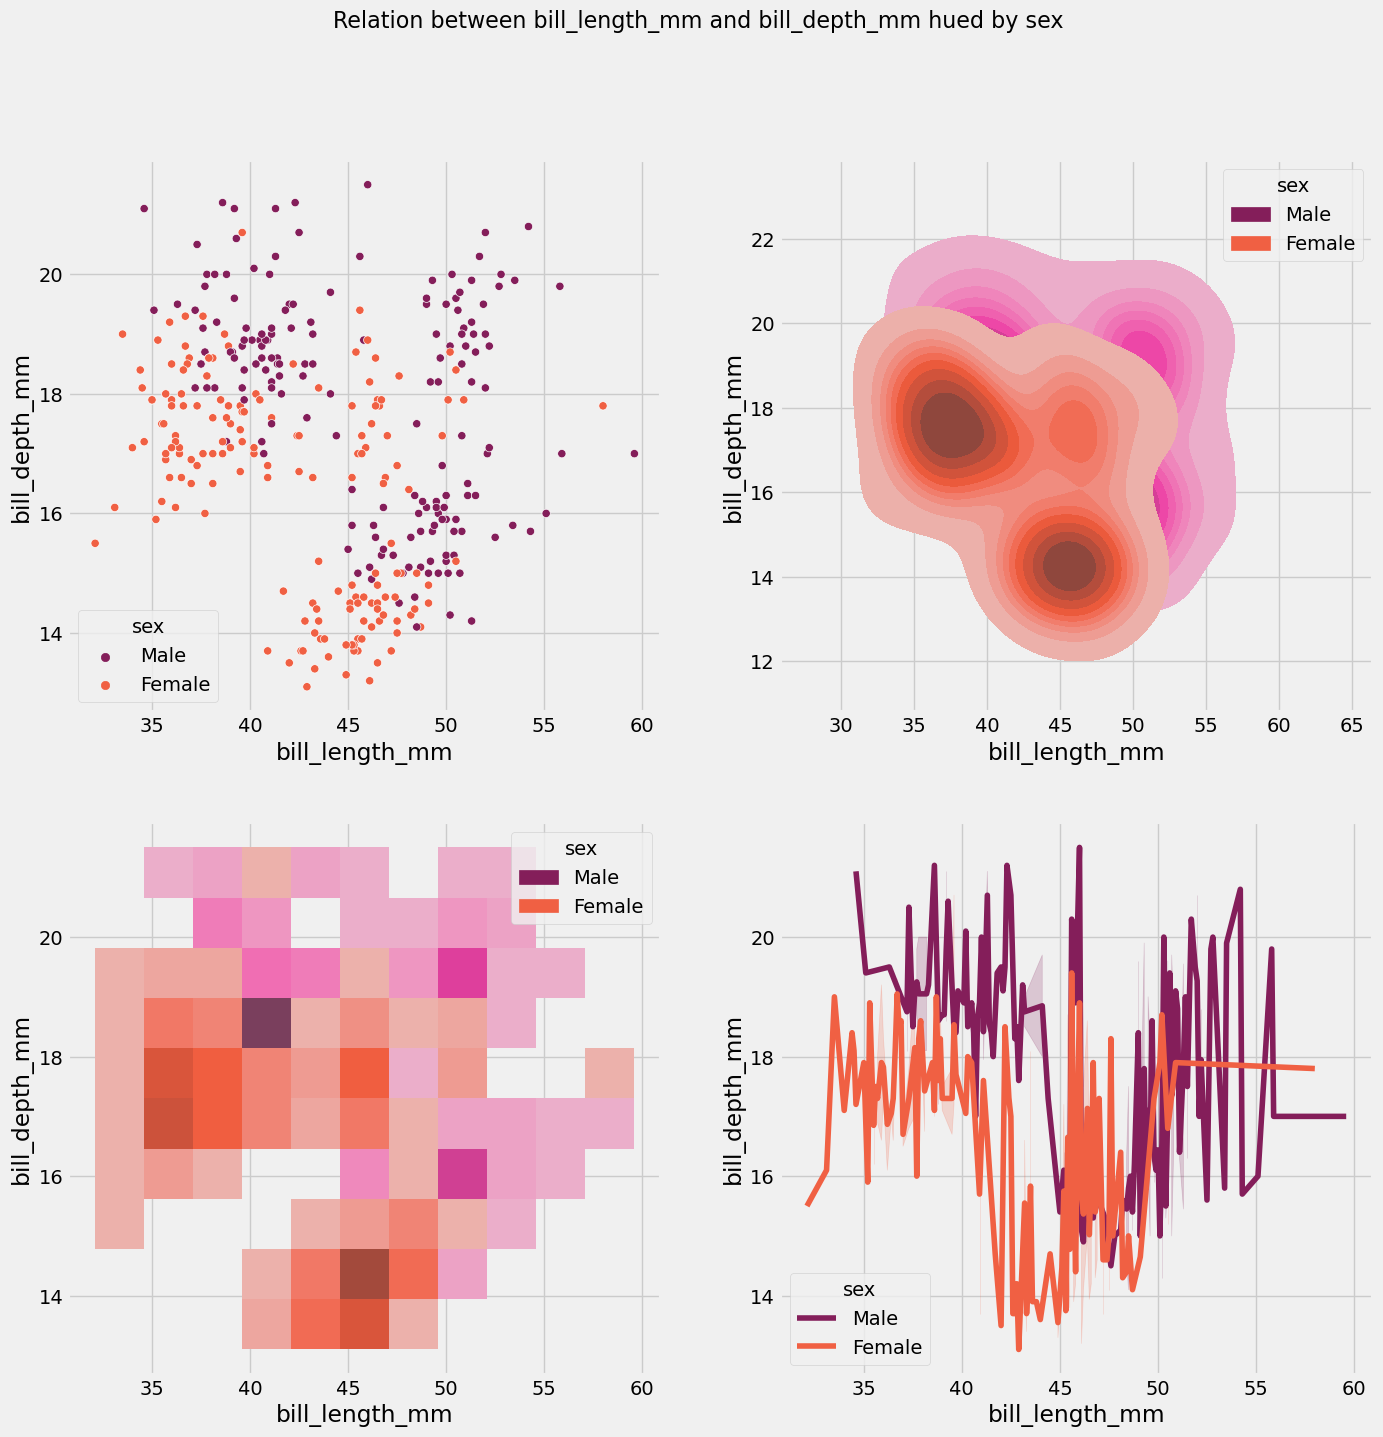

In [26]:
scatterplot(p,'bill_length_mm','bill_depth_mm','sex','Relation between bill_length_mm and bill_depth_mm hued by sex')

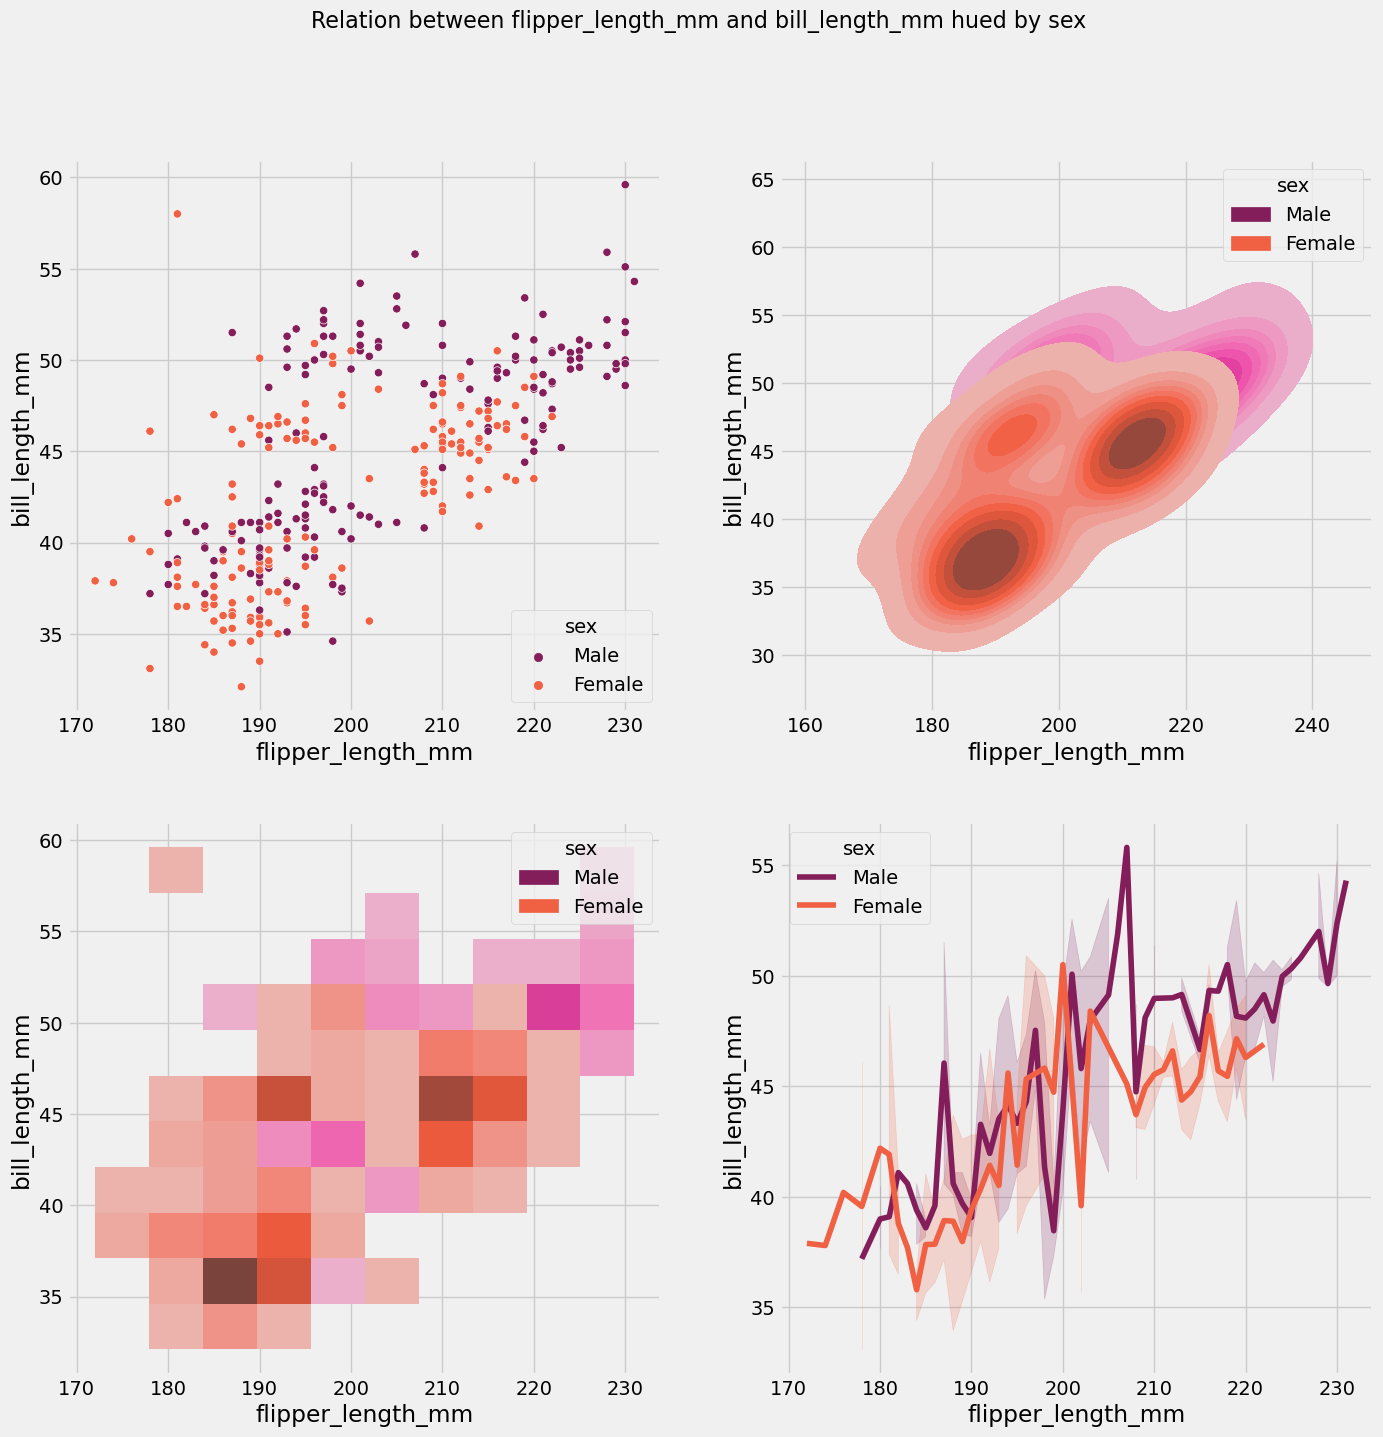

In [27]:
scatterplot(p,'flipper_length_mm','bill_length_mm','sex','Relation between flipper_length_mm and bill_length_mm hued by sex')

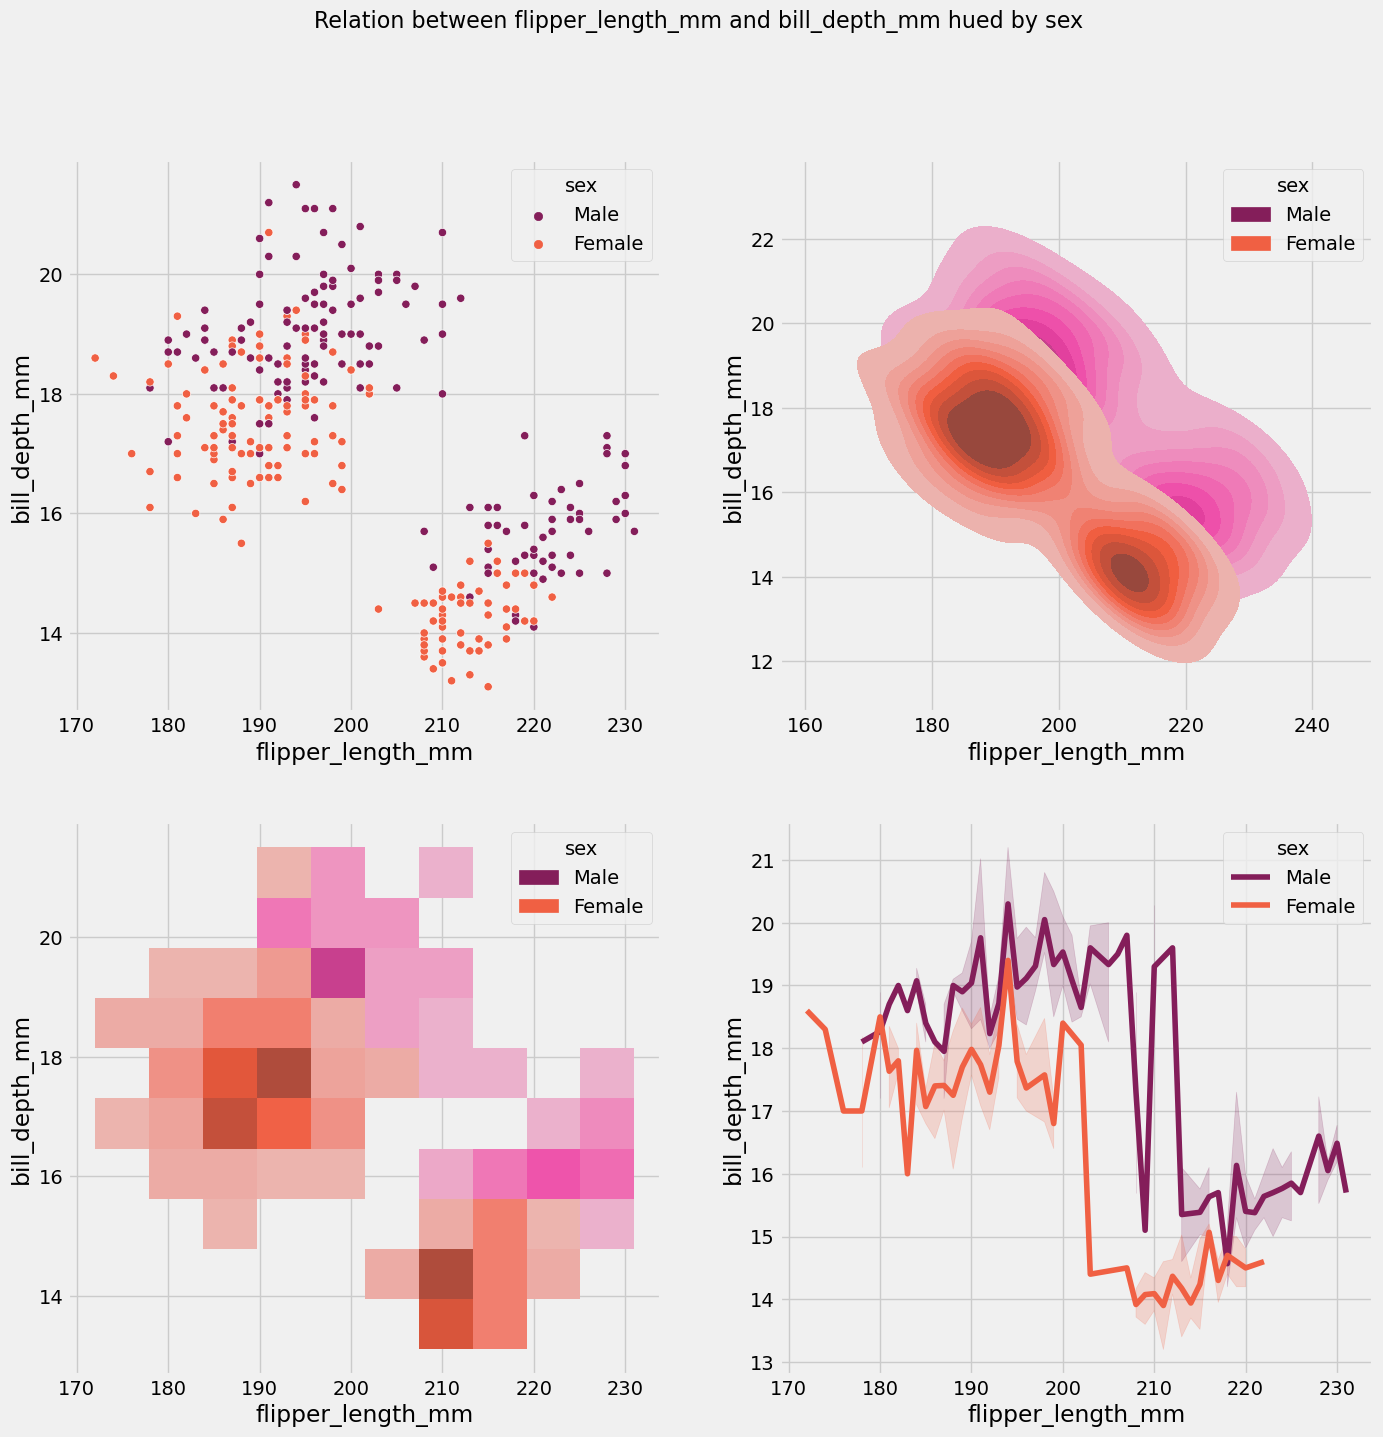

In [28]:
scatterplot(p,'flipper_length_mm','bill_depth_mm','sex','Relation between flipper_length_mm and bill_depth_mm hued by sex')

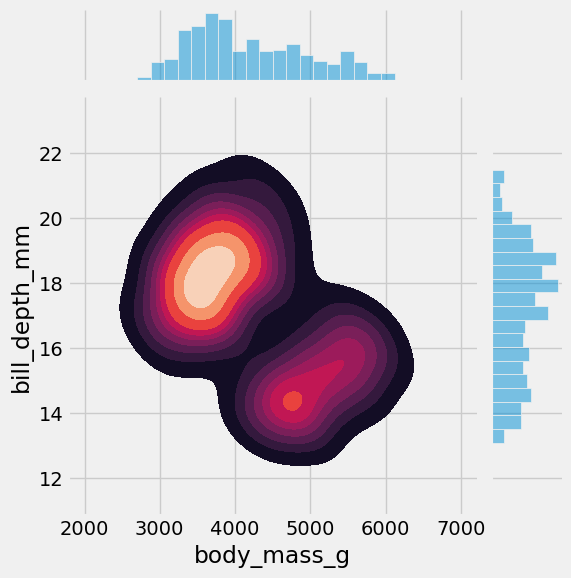

In [33]:
# Relation between body_mass and bill_depth_mm
g = sns.JointGrid(data=p,x='body_mass_g',y='bill_depth_mm')
g.plot_joint(sns.kdeplot,fill=True,cmap='rocket')
g.plot_marginals(sns.histplot,alpha=0.5,bins=20)

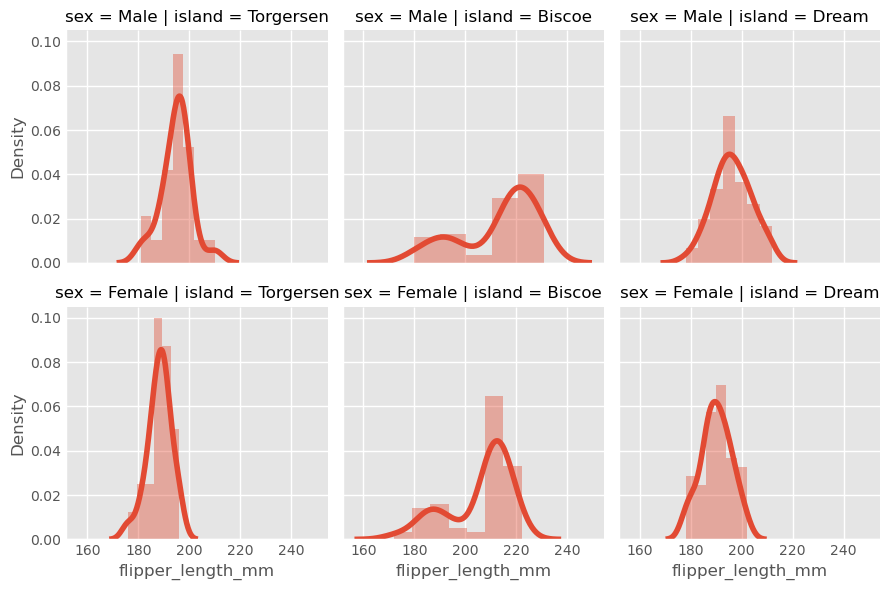

In [35]:
# Density of flipper lengthby hued by sex
plt.style.use('ggplot')
a = sns.FacetGrid(p,col='island',row='sex')
a.map(sns.distplot,'flipper_length_mm')
plt.show()

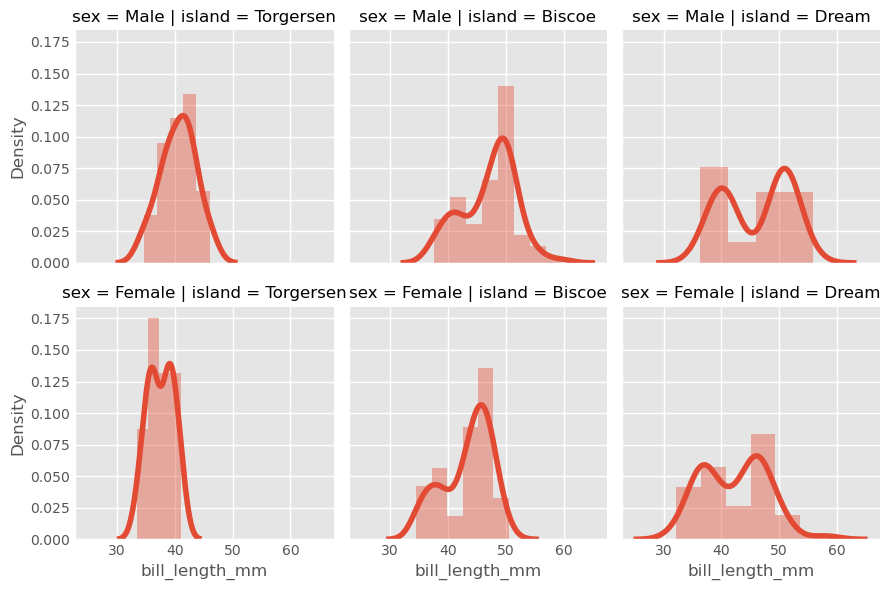

In [36]:
# density of bill_length_mm hued by sex
sns.FacetGrid(p,col='island',row='sex').map(sns.distplot,'bill_length_mm')

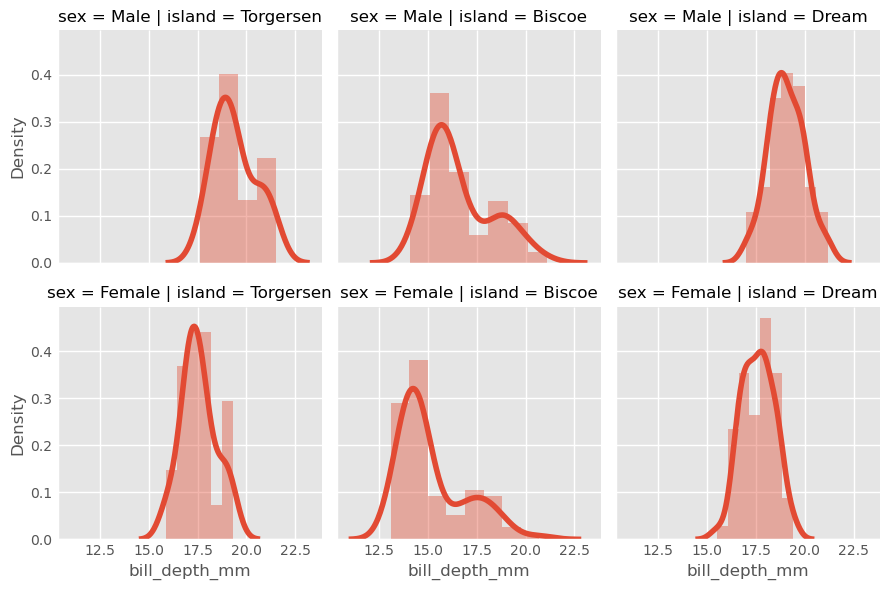

In [37]:
sns.FacetGrid(p,col='island',row='sex').map(sns.distplot,'bill_depth_mm')

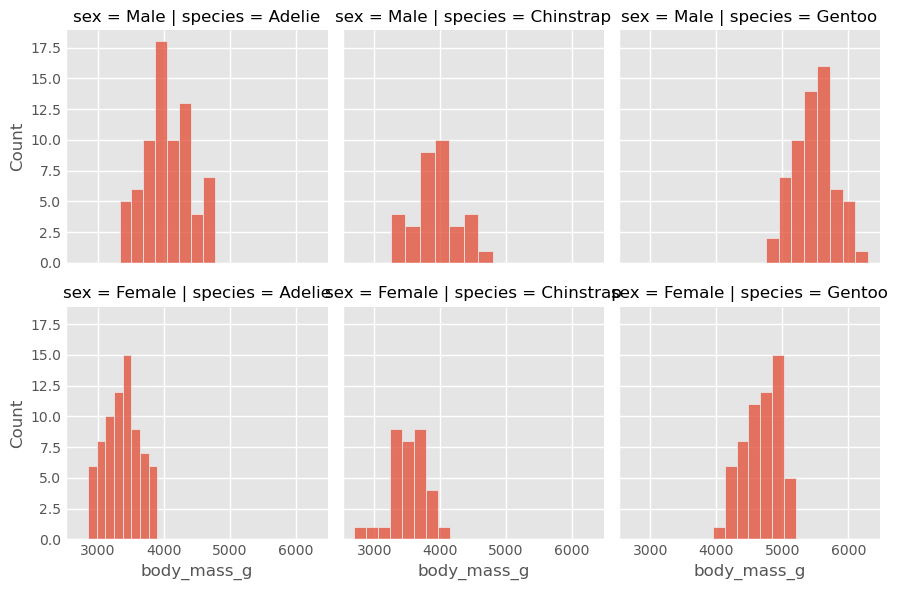

In [77]:
# Comparing with species
plt.style.use('ggplot')
sns.FacetGrid(p,col='species',row='sex').map(sns.histplot,'body_mass_g',ax=ax)
plt.show()

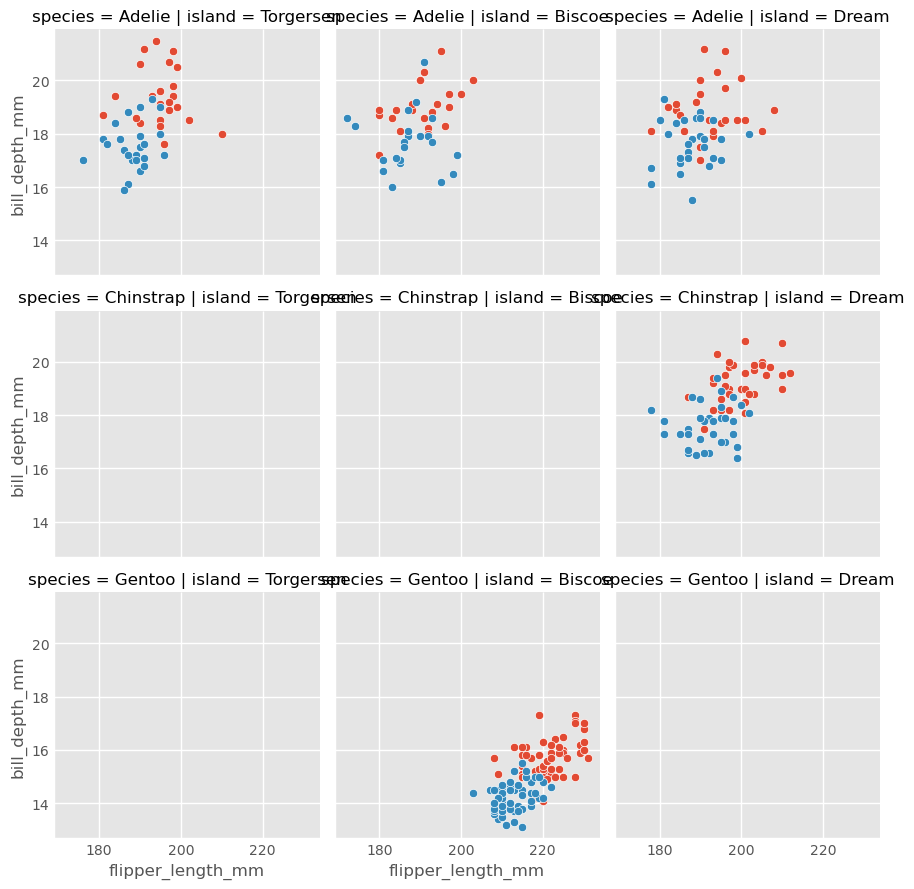

In [53]:
plt.style.use('ggplot')
sns.FacetGrid(p,col='island',hue='sex',row='species').map(sns.scatterplot,'flipper_length_mm','bill_depth_mm')
plt.xlabel('',fontsize=8)
plt.show()

In [50]:
p[['species','island','sex']].value_counts()

species    island     sex   
Gentoo     Biscoe     Male      61
                      Female    58
Chinstrap  Dream      Female    34
                      Male      34
Adelie     Dream      Male      28
                      Female    27
           Torgersen  Female    24
                      Male      23
           Biscoe     Female    22
                      Male      22
dtype: int64